In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_name = 'Folkhalsomyndigheten_Covid19.xlsx'

In [22]:
xl = pd.ExcelFile('data/'+file_name)
xl.sheet_names
iva = xl.parse('Antal intensivvårdade per dag')

In [23]:
iva.columns = ['date', 'daily']
iva['date'] = iva['date'].dt.date
iva['rolling'] = iva['daily'].rolling(10, center=True).mean()
niva = pd.melt(iva, id_vars='date', var_name='typ', value_name='n')

In [24]:
niva.head()

,date,typ,n
0,2020-03-06,daily,1.0
1,2020-03-07,daily,1.0
2,2020-03-08,daily,1.0
3,2020-03-09,daily,0.0
4,2020-03-10,daily,2.0


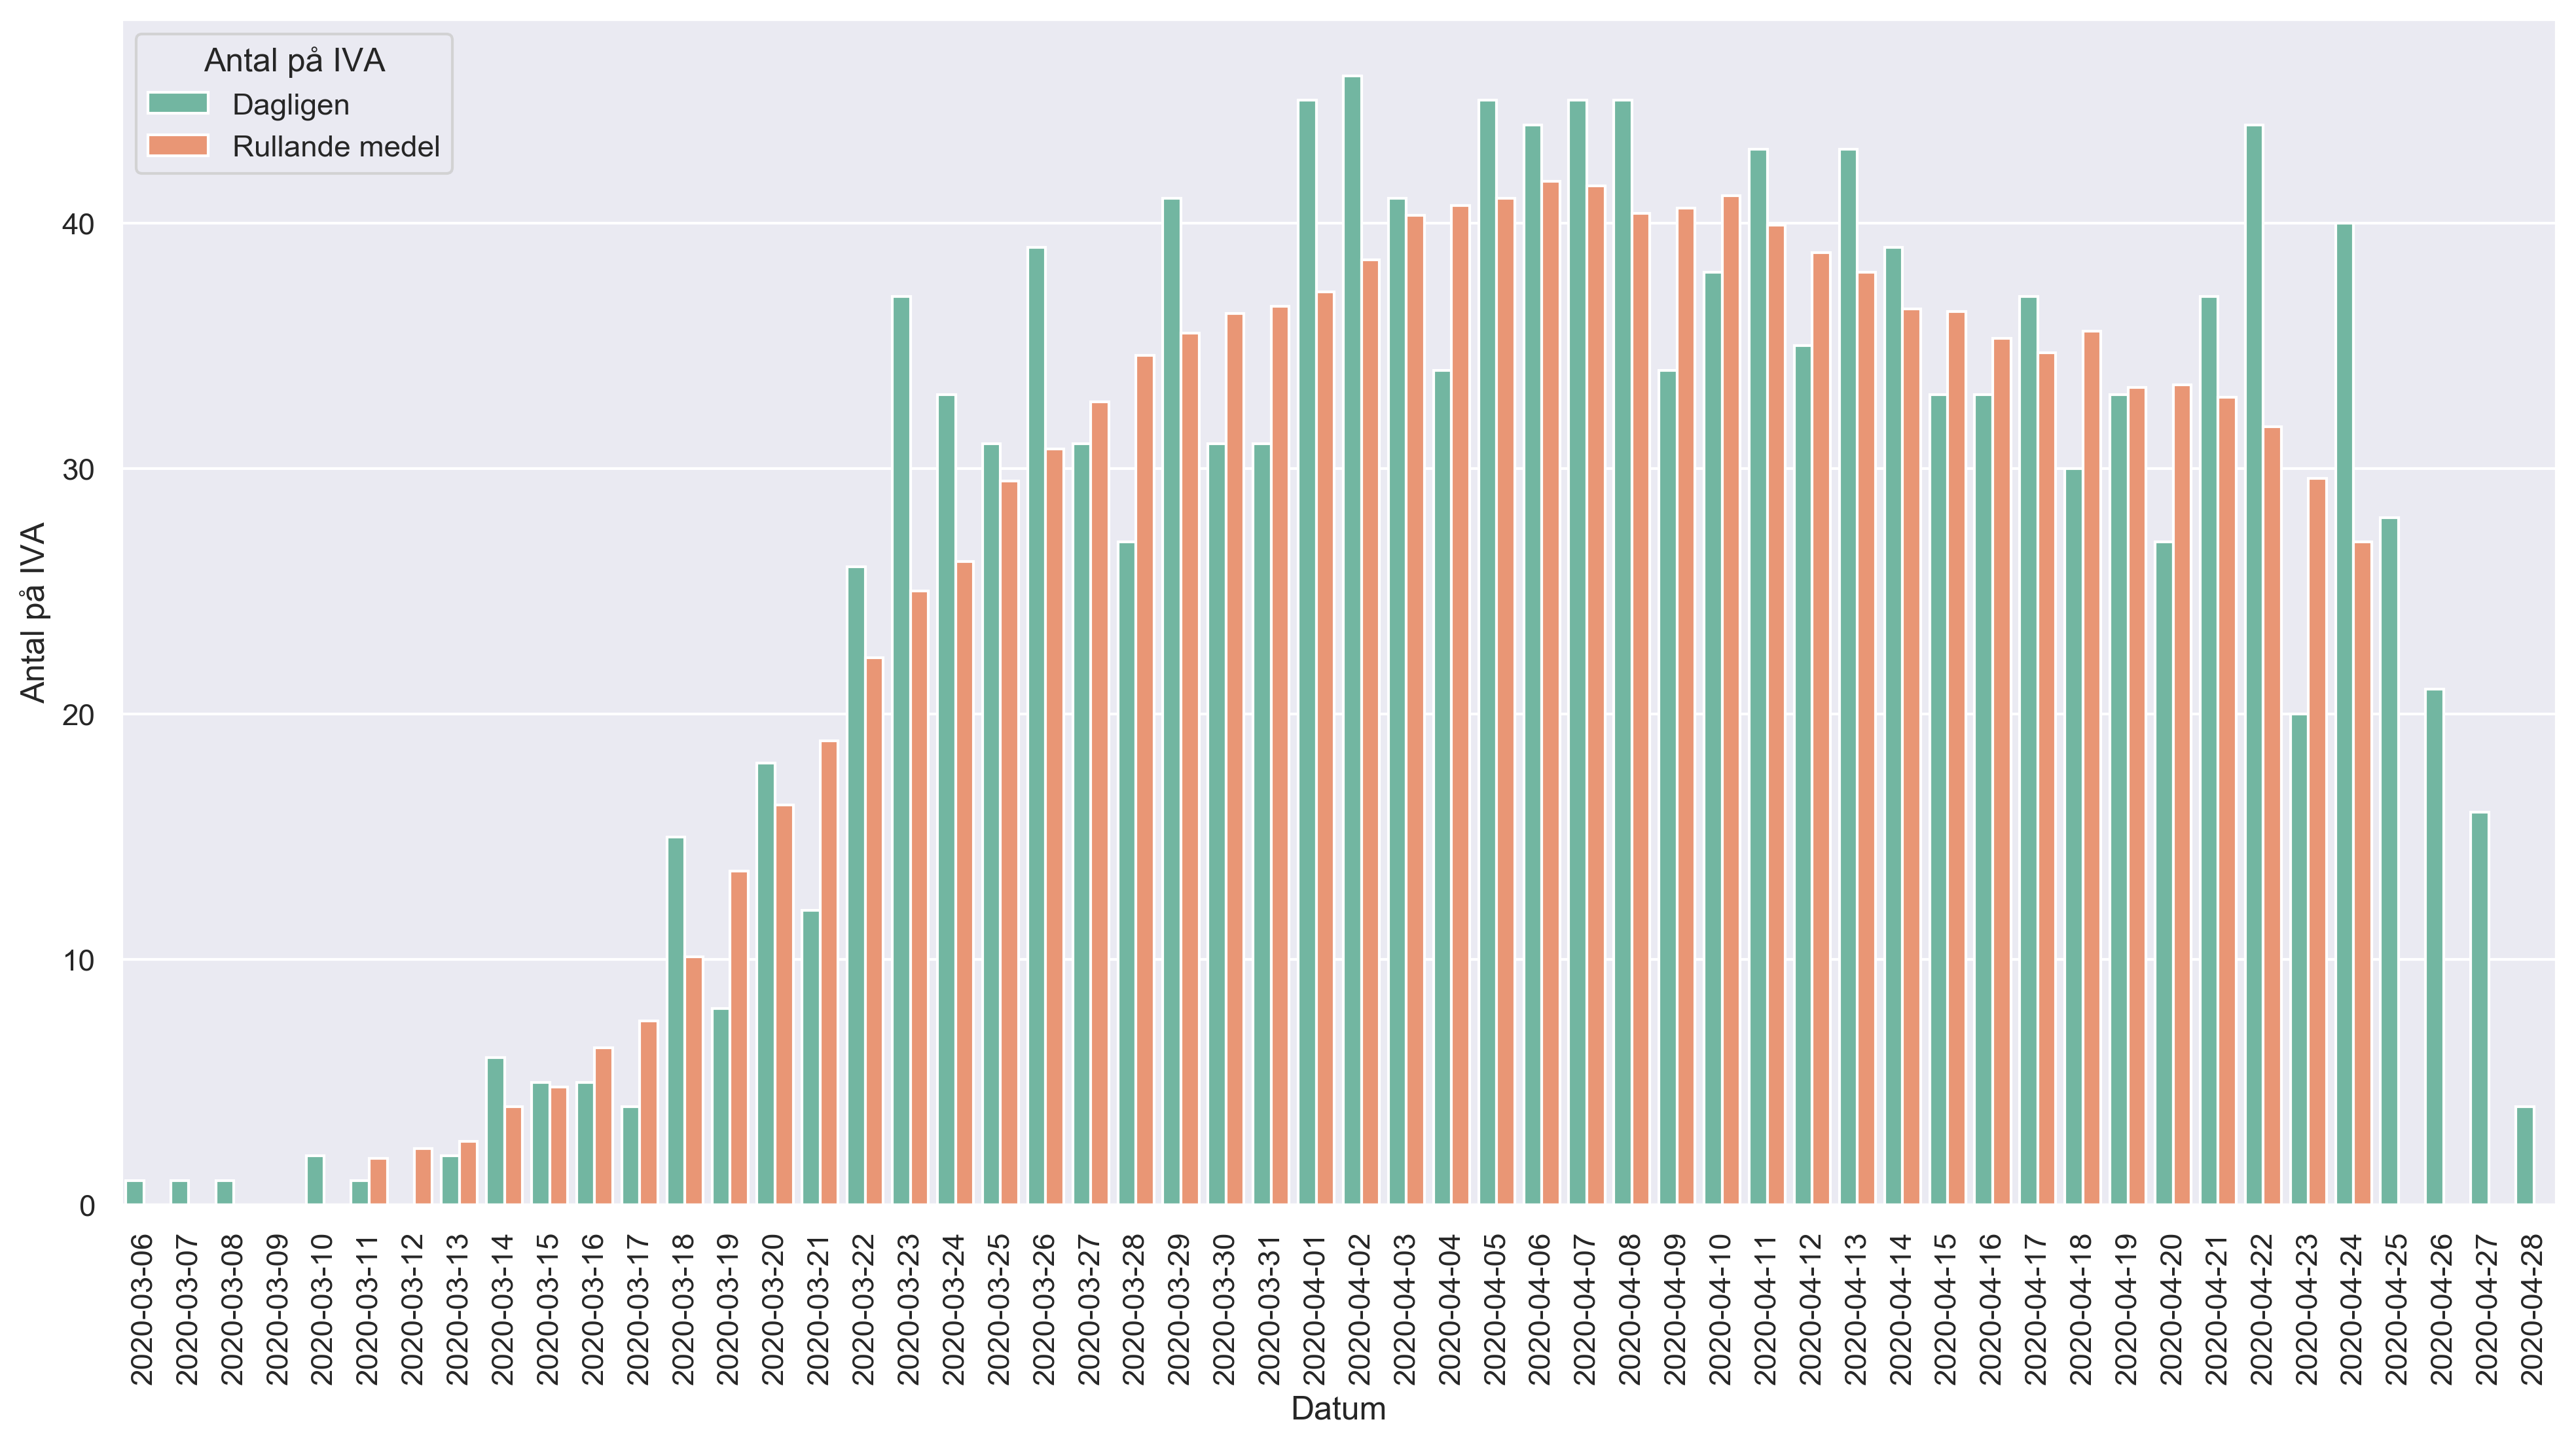

In [25]:
sns.set()
sns.set_palette('Set2')
f, ax = plt.subplots(figsize=(16,8), dpi=300)

g = sns.barplot(data=niva, x='date', y='n', hue='typ', ax=ax)

plt.xticks(rotation=90)
ax.set_ylabel('Antal på IVA')
ax.set_xlabel('Datum')

h, l = ax.get_legend_handles_labels()
plt.legend(loc='upper left', title='Antal på IVA', labels=['Dagligen', 'Rullande medel'], handles=h)

plt.savefig('graphs/niva.png', bbox_inches='tight')
